In [1]:
from ultralytics import YOLO
import os
import pandas as pd
import xml.etree.ElementTree as et
from glob import glob
import numpy as np
from sklearn.preprocessing import LabelEncoder
import cv2
import matplotlib as plt

## Convert XML files to .txt files
and normalise the coordinates

In [4]:
#create column names for dataframe used later on and an empty list to fill in

df_columns = ['filename', 'page_height', 'page_width','type', 'x', 'y', 'width', 'height']

tmp = []

In [5]:
#find all files that match the filepath and have the .xml extension

path = glob('tobacco_data_zhugy/Tobacc800_Groundtruth_v2.0/XMLGroundtruth_v2.0/*.xml')

In [56]:
#make a loop that iteratively adds to a list the attributes from the xml files
for file in path:
    myroot = et.parse(file).getroot()
    page_height, page_width =  myroot[0][0].attrib['height'], myroot[0][0].attrib['width']
    
    filename = myroot[0].attrib['src']
    
    for item in myroot[0][0]:
        category = item.attrib['gedi_type'] #logo or signature
        x, y = item.attrib['col'], item.attrib['row'] # x and y coordinate
        width, height = item.attrib['width'], item.attrib['height'] # width and height of bounding box
            
        row = [filename, page_height, page_width, category, x, y, width, height]
        tmp.append(row)
        
    df = pd.DataFrame(tmp, columns = df_columns)

In [57]:
df

,filename,page_height,page_width,type,x,y,width,height
0,aah97e00-page02_1.tif,3296,2560,DLLogo,1074,18,374,219
1,aah97e00-page02_2.tif,3296,2560,DLSignature,1409,793,659,361
2,aam09c00.tif,2292,1728,DLSignature,821,1422,757,183
3,aao54e00_2.tif,3296,2560,DLSignature,1514,708,627,206
4,abm69c00.tif,2292,1728,DLSignature,667,1279,617,110
...,...,...,...,...,...,...,...,...
9389,zrz94a00-page02_1.tif,2156,1728,DLLogo,737,116,191,124
9390,zrz94a00-page02_2.tif,2156,1728,DLSignature,828,1046,362,91
9391,zss86d00.tif,2292,1728,DLSignature,867,1734,363,189
9392,ztz52d00-page02_2.tif,2292,1728,DLSignature,896,651,205,178


In [58]:
#delete logos since not looking for those in this case
df = df[df['type'].str.contains('DLLogo')==False]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 1 to 9393
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     6370 non-null   object
 1   page_height  6370 non-null   object
 2   page_width   6370 non-null   object
 3   type         6370 non-null   object
 4   x            6370 non-null   object
 5   y            6370 non-null   object
 6   width        6370 non-null   object
 7   height       6370 non-null   object
dtypes: object(8)
memory usage: 447.9+ KB


In [61]:
df['page_height'] = pd.to_numeric(df['page_height'])
df['page_width'] = pd.to_numeric(df['page_width'])
df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])
df['width'] = pd.to_numeric(df['width'])
df['height'] = pd.to_numeric(df['height'])

C:\Users\sinea\AppData\Local\Temp\ipykernel_24484\1079195593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['page_height'] = pd.to_numeric(df['page_height'])
C:\Users\sinea\AppData\Local\Temp\ipykernel_24484\1079195593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['page_width'] = pd.to_numeric(df['page_width'])
C:\Users\sinea\AppData\Local\Temp\ipykernel_24484\1079195593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 1 to 9393
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     6370 non-null   object
 1   page_height  6370 non-null   int64 
 2   page_width   6370 non-null   int64 
 3   type         6370 non-null   object
 4   x            6370 non-null   int64 
 5   y            6370 non-null   int64 
 6   width        6370 non-null   int64 
 7   height       6370 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 447.9+ KB


In [63]:
#normalise the coordinates
df['x_norm'] = (df['x'] + (df['width']/2)) / df['page_width']
df['y_norm'] = (df['y'] + (df['height']/2)) / df['page_height']
df['width_norm'] = df['width'] / df['page_width']
df['height_norm'] = df['height'] / df['page_height']

C:\Users\sinea\AppData\Local\Temp\ipykernel_24484\1667169614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_norm'] = (df['x'] + (df['width']/2)) / df['page_width']
C:\Users\sinea\AppData\Local\Temp\ipykernel_24484\1667169614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_norm'] = (df['y'] + (df['height']/2)) / df['page_height']
C:\Users\sinea\AppData\Local\Temp\ipykernel_24484\1667169614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [64]:
#encode labels
le = LabelEncoder()

le.fit(df['type'])
labels = le.transform(df['type'])
df['labels'] = labels

C:\Users\sinea\AppData\Local\Temp\ipykernel_24484\2092480702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = labels


In [65]:
df

,filename,page_height,page_width,type,x,y,width,height,x_norm,y_norm,width_norm,height_norm,labels
1,aah97e00-page02_2.tif,3296,2560,DLSignature,1409,793,659,361,0.679102,0.295358,0.257422,0.109527,0
2,aam09c00.tif,2292,1728,DLSignature,821,1422,757,183,0.694155,0.660340,0.438079,0.079843,0
3,aao54e00_2.tif,3296,2560,DLSignature,1514,708,627,206,0.713867,0.246056,0.244922,0.062500,0
4,abm69c00.tif,2292,1728,DLSignature,667,1279,617,110,0.564525,0.582024,0.357060,0.047993,0
5,acr64d00.tif,2292,1728,DLSignature,886,1801,463,181,0.646701,0.825262,0.267940,0.078970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9387,zrt45f00.tif,1575,1200,DLSignature,514,1019,278,48,0.544167,0.662222,0.231667,0.030476,0
9390,zrz94a00-page02_2.tif,2156,1728,DLSignature,828,1046,362,91,0.583912,0.506262,0.209491,0.042208,0
9391,zss86d00.tif,2292,1728,DLSignature,867,1734,363,189,0.606771,0.797775,0.210069,0.082461,0
9392,ztz52d00-page02_2.tif,2292,1728,DLSignature,896,651,205,178,0.577836,0.322862,0.118634,0.077661,0


In [66]:
df_train = df.iloc[:728]
df_valid = df.iloc[728:]

print(df_train.shape, df_valid.shape)

(728, 13) (5642, 13)


In [67]:
def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.filename:
    filenames.append(filename)
  filenames = set(filenames)
  
  for filename in filenames:
    yolo_list = []
   
    #make the df into a format that yolo can read
    for _,row in df[df.filename == filename].iterrows():
      yolo_list.append([row.labels, row.x_norm, row.y_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.filename.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.filename), os.path.join(train_img_path,row.filename))

    #adapted from https://github.com/amaljoseph/Signature-Verification_System_using_YOLOv5-and-CycleGAN/tree/master

In [68]:
# Apply function
src_img_path = r"\tobacco_data_zhugy\Tobacco800_SinglePage\SinglePageTIF"
src_label_path = r"\tobacco_data_zhugy\Tobacc800_Groundtruth_v2.0\XMLGroundtruth_v2.0"

train_img_path = r"\yolov8\train\images"
train_label_path = r"\yolov8\train\labels"

valid_img_path = r"\yolov8\valid\images"
valid_label_path = r"\yolov8\valid\labels"

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

## Set up parameters

Put parameters for YOLOV8 model in .yaml file 

        path: C:\\Users\\sinea\\Documents\\Dissertation\\yolov8

        train: 'train'

        val: 'valid'

        nc: 1

        #class name

        names: 

          0 : 'DLSignature'

## Initiate YOLOV8 model

In [69]:
model = YOLO("yolov8n.pt")  

In [6]:
#run model

model.train(data='custom.yaml', epochs=100, rect=True, batch=32)

New https://pypi.org/project/ultralytics/8.0.154 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145  Python-3.9.12 torch-2.0.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=custom.yaml, epochs=200, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.24s/it]
                   all        241        182      0.896      0.874      0.917      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/200         0G      1.031     0.7237     0.9822         27        512:  97%|█████████▋| 32/33 [06:05<00:11, 11.41s/it]


KeyboardInterrupt: 

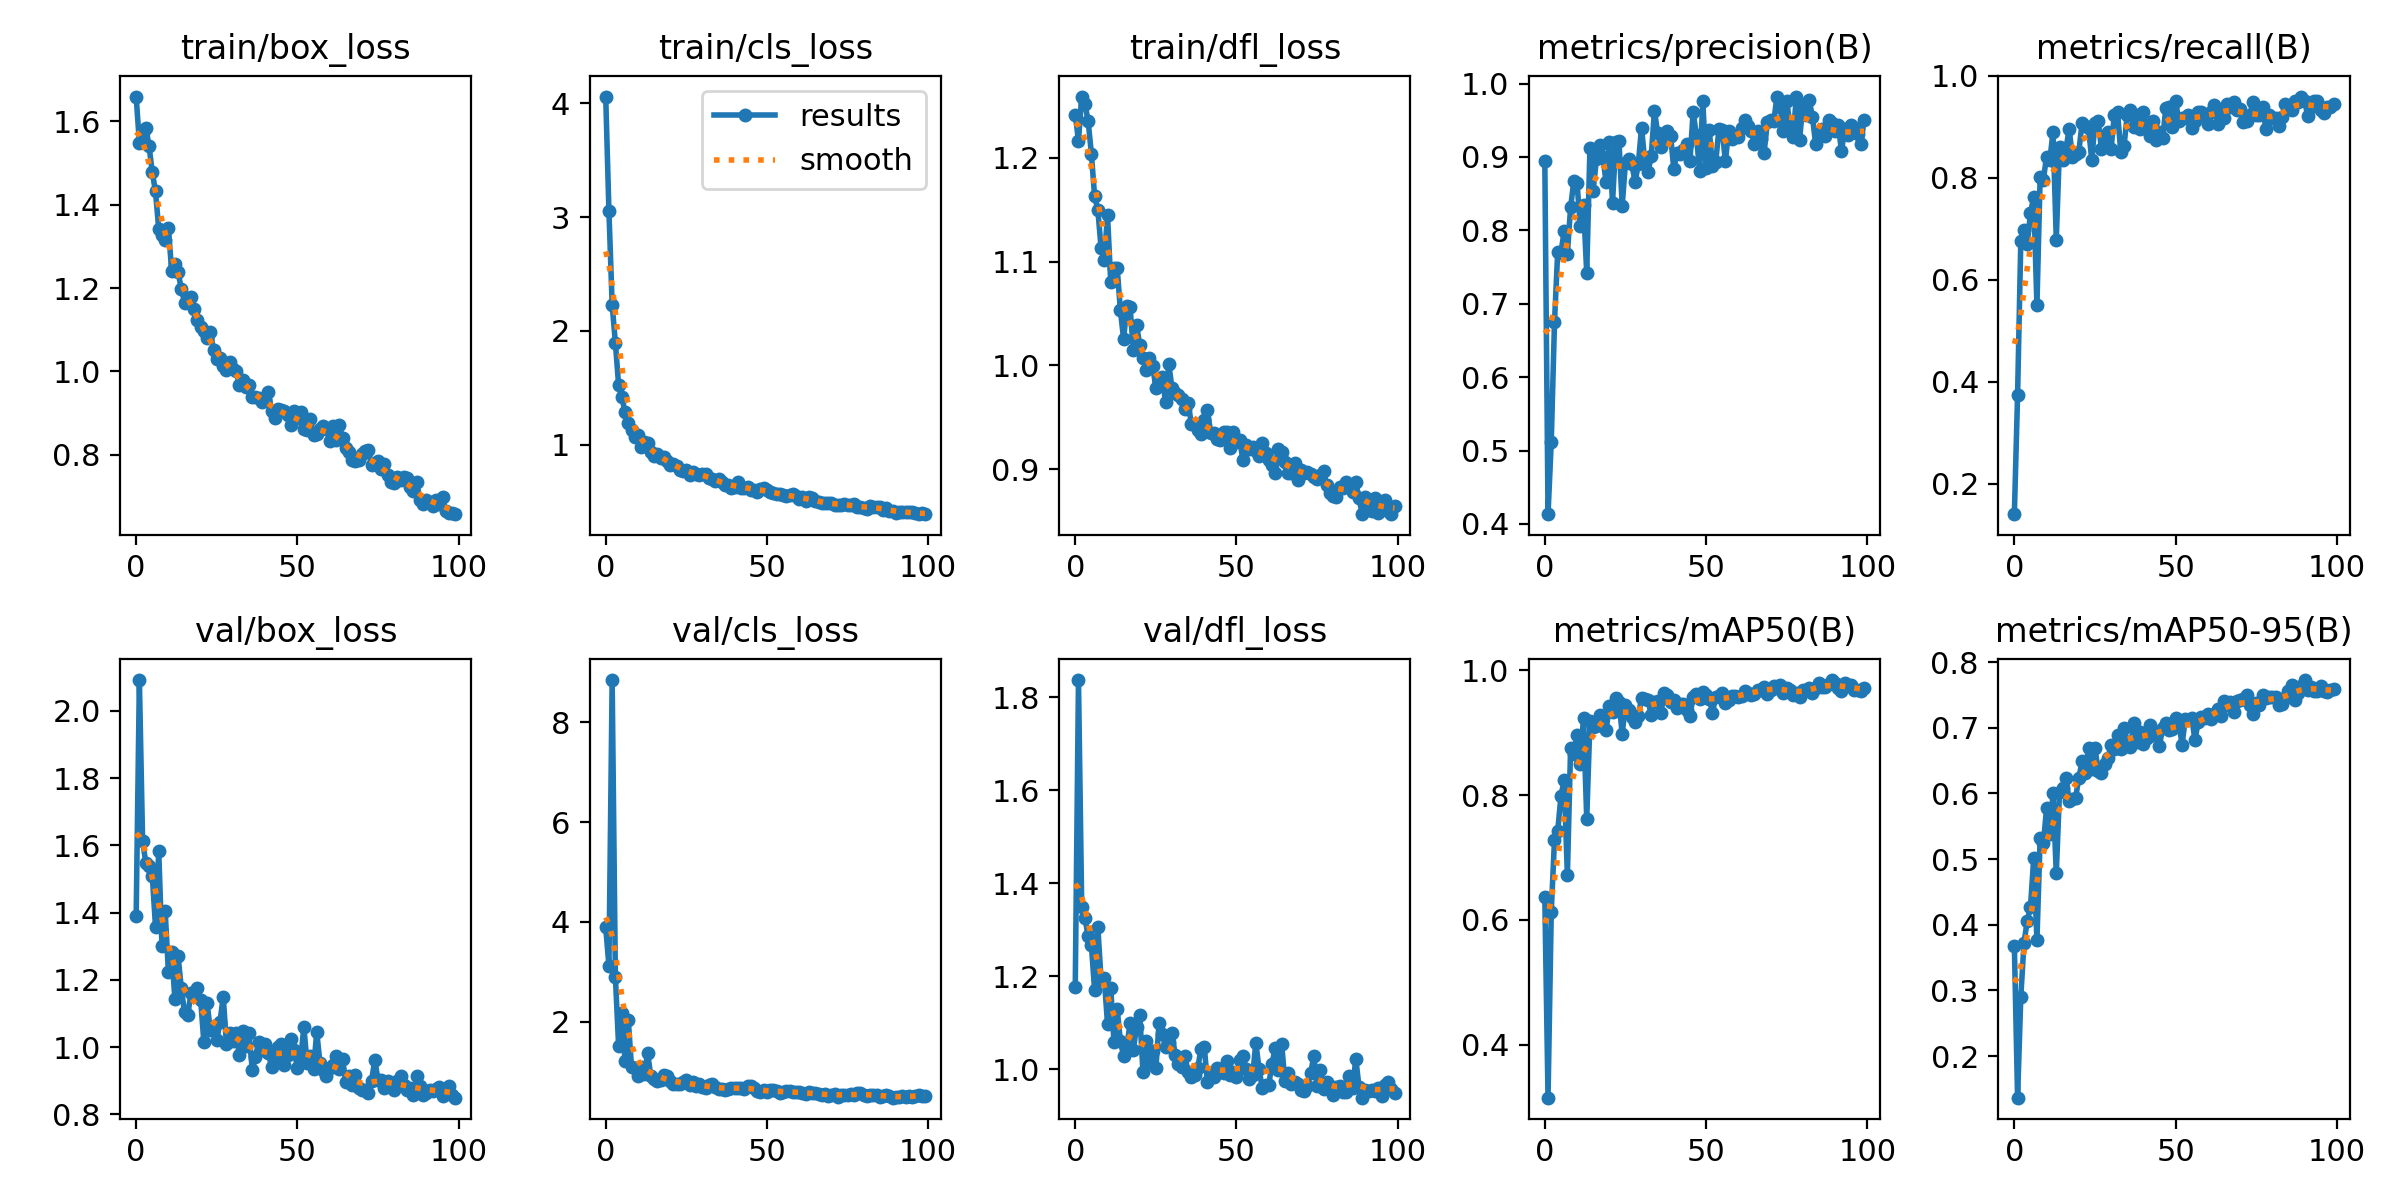

In [77]:
from IPython import display
display.Image(r"c:\Users\sinea\Documents\Dissertation\runs\detect\train7\results.png")

## Test YOLO model

In [79]:
import time

model = YOLO('runs/detect/train7/weights/best.pt')  # load a custom model

In [85]:
start_time = time.time()

# Predict with the model
results2 = model(r"\tobacco_data_zhugy\Tobacco800_SinglePage\test")  # predict on an image
print("Process finished --- %s seconds ---" % (time.time() - start_time))


image 1/10 C:\Users\sinea\Documents\Dissertation\tobacco_data_zhugy\Tobacco800_SinglePage\test\ebp68d00-page02_1.jpg: 640x512 (no detections), 70.0ms
image 2/10 C:\Users\sinea\Documents\Dissertation\tobacco_data_zhugy\Tobacco800_SinglePage\test\ebp68d00-page02_2.jpg: 640x512 1 DLSignature, 72.0ms
image 3/10 C:\Users\sinea\Documents\Dissertation\tobacco_data_zhugy\Tobacco800_SinglePage\test\eck05f00_1.jpg: 640x512 1 DLSignature, 72.0ms
image 4/10 C:\Users\sinea\Documents\Dissertation\tobacco_data_zhugy\Tobacco800_SinglePage\test\eck05f00_2.jpg: 640x512 (no detections), 68.0ms
image 5/10 C:\Users\sinea\Documents\Dissertation\tobacco_data_zhugy\Tobacco800_SinglePage\test\ecn9aa00.jpg: 640x480 1 DLSignature, 71.0ms
image 6/10 C:\Users\sinea\Documents\Dissertation\tobacco_data_zhugy\Tobacco800_SinglePage\test\ecv85f00.jpg: 640x512 2 DLSignatures, 72.0ms
image 7/10 C:\Users\sinea\Documents\Dissertation\tobacco_data_zhugy\Tobacco800_SinglePage\test\edj50e00-first_1.jpg: 640x512 (no detection

Process finished --- 1.4223215579986572 seconds ---


In [88]:
for result in results2:
    # detection
    bbox = result.boxes.xyxy   # box with xyxy format, (N, 4)
    print(bbox)

tensor([], size=(0, 4))
tensor([[1241.4031, 1711.7585, 1730.8242, 1861.3965]])
tensor([[607.3404, 739.2679, 982.3967, 832.2659]])
tensor([], size=(0, 4))
tensor([[1509.6980, 2970.5330, 2066.3906, 3091.3665]])
tensor([[ 601.4812,  910.2979,  900.9907, 1016.1695],
        [ 946.5216,  765.6918, 1099.9220,  847.5261]])
tensor([], size=(0, 4))
tensor([], size=(0, 4))
tensor([[ 127.3660, 1029.1831,  533.2072, 1148.5869]])
tensor([[510.2356, 884.7560, 690.5710, 948.5905]])


In [89]:
for result in results2:
    # detection
    bboxs = result.boxes.conf   
    print(bboxs)

tensor([])
tensor([0.8700])
tensor([0.8959])
tensor([])
tensor([0.5753])
tensor([0.9154, 0.8856])
tensor([])
tensor([])
tensor([0.9038])
tensor([0.8701])


## Azure Cognitive Services API

Start with cognitive services web portal to label data and train the model

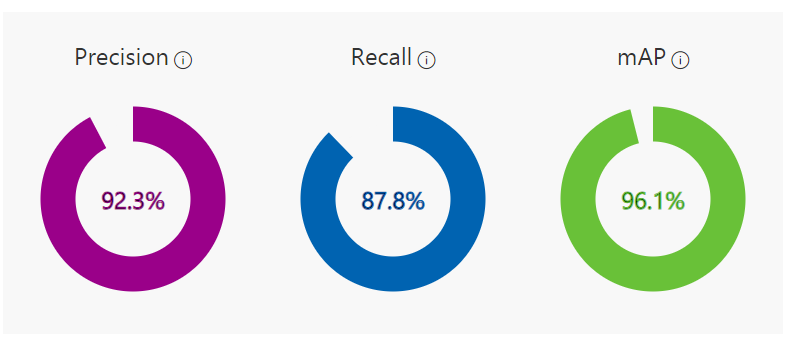

In [ ]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import requests
import os
from pathlib import Path

start_time = time.time()

# name prediction key and endpoint
prediction_key = ""
prediction_ENDPOINT = ""

# create prediction client
prediction_credentials = ApiKeyCredentials(
    in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(prediction_ENDPOINT, prediction_credentials)

# connect to Azure
base_url = predictor.config.base_url.format(Endpoint=prediction_ENDPOINT[:-1])
prediction_url = "/detect/iterations/Iteration5/image"

# Set the threshold probability for predictions
threshold_probability = 0.5

# Process each image in the folder
image_folder = r"\tobacco_data_zhugy\Tobacco800_SinglePage\test"
images = os.listdir(image_folder)

# Create an empty list to store the prediction results
results = []

# make loop that sends each image in folder to Azure and returns prbability
for image_name in images:
    # Open the image file
    with open(os.path.join(image_folder, image_name), "rb") as image_file:
        # Send the image for prediction
        headers = {"Prediction-Key": prediction_key,
                   "Content-Type": "application/octet-stream"}
        response = requests.post(
            prediction_url, headers=headers, data=image_file)

        # Process the prediction response
        predictions = response.json()["predictions"]

        # Access and use the prediction list and if its probability is above the threshold set earlier, append result to list

        for prediction in predictions:
            if prediction["probability"] >= threshold_probability:
                tag_name = prediction["tagName"]
                probability = prediction["probability"]
                bbox = prediction["boundingBox"]
                left = bbox["left"]
                top = bbox["top"]
                width = bbox["width"]
                height = bbox["height"]

                results.append({"ImageName": image_name, "TagName": tag_name,
                                    "Probability": probability, "Left": left,
                                    "Top": top, "Width": width, "Height": height})


# Convert results list to a DataFrame and save as a csv file
df = pd.DataFrame(results)

filepath = Path('/azure_predictions.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

print("Process finished --- %s seconds ---" % (time.time() - start_time))


In [97]:
df_azure = pd.read_csv("azure_predictions.csv")
df_azure.head()

,Unnamed: 0,ImageName,TagName,Probability,Left,Top,Width,Height
0,0,ebp68d00-page02_2.jpg,Signature,0.808588,0.503442,0.539567,0.162828,0.042704
1,1,eck05f00_1.jpg,Signature,0.873512,0.514731,0.463599,0.291193,0.059914
2,2,ecn9aa00.jpg,Signature,0.748574,0.564532,0.836222,0.246143,0.040826
3,3,ecv85f00.jpg,Signature,0.879367,0.495811,0.581591,0.247534,0.066461
4,4,ecv85f00.jpg,Signature,0.545693,0.799619,0.487201,0.116788,0.050406


## Comparison of models against ground truth

In [48]:
df_azure["Image_width"] = [2544, 1200, 2624, 1200, 1200, 2560, 1200]

In [50]:
df_azure["Image_height"] = [3189, 1575, 3584, 1575, 1575, 3294, 1575]

In [51]:
df_azure

,Unnamed: 0,ImageName,TagName,Probability,Left,Top,Width,Height,Image_width,Image_height
0,0,ebp68d00-page02_2.jpg,Signature,0.808588,0.503442,0.539567,0.162828,0.042704,2544,3189
1,1,eck05f00_1.jpg,Signature,0.873512,0.514731,0.463599,0.291193,0.059914,1200,1575
2,2,ecn9aa00.jpg,Signature,0.748574,0.564532,0.836222,0.246143,0.040826,2624,3584
3,3,ecv85f00.jpg,Signature,0.879367,0.495811,0.581591,0.247534,0.066461,1200,1575
4,4,ecv85f00.jpg,Signature,0.545693,0.799619,0.487201,0.116788,0.050406,1200,1575
5,5,edj50e00-first_3.jpg,Signature,0.596437,0.069727,0.307171,0.131362,0.041440,2560,3294
6,6,eeo04f00.jpg,Signature,0.765594,0.438447,0.561261,0.140632,0.045776,1200,1575


In [52]:
df_azure["norm_x"] = df_azure['Left'] * df_azure['Image_width']
df_azure['norm_y']= df_azure['Top'] * df_azure['Image_height']

df_azure['norm_width']= df_azure['Width'] * df_azure['Image_height']
df_azure['norm_height']= df_azure['Height'] * df_azure['Image_height']

In [53]:
df_azure

,Unnamed: 0,ImageName,TagName,Probability,Left,Top,Width,Height,Image_width,Image_height,norm_x,norm_y,norm_width,norm_height
0,0,ebp68d00-page02_2.jpg,Signature,0.808588,0.503442,0.539567,0.162828,0.042704,2544,3189,1280.756194,1720.679801,519.259130,136.182252
1,1,eck05f00_1.jpg,Signature,0.873512,0.514731,0.463599,0.291193,0.059914,1200,1575,617.676720,730.169055,458.629369,94.364586
2,2,ecn9aa00.jpg,Signature,0.748574,0.564532,0.836222,0.246143,0.040826,2624,3584,1481.331181,2997.019290,882.176870,146.320251
3,3,ecv85f00.jpg,Signature,0.879367,0.495811,0.581591,0.247534,0.066461,1200,1575,594.973500,916.005668,389.865593,104.676028
4,4,ecv85f00.jpg,Signature,0.545693,0.799619,0.487201,0.116788,0.050406,1200,1575,959.543112,767.341733,183.940486,79.389981
5,5,edj50e00-first_3.jpg,Signature,0.596437,0.069727,0.307171,0.131362,0.041440,2560,3294,178.502349,1011.821043,432.706692,136.504865
6,6,eeo04f00.jpg,Signature,0.765594,0.438447,0.561261,0.140632,0.045776,1200,1575,526.136436,883.986862,221.494849,72.097499


In [2]:
image = cv2.imread(r"tobacco_data_zhugy\Tobacco800_SinglePage\test\ecv85f00.jpg")

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

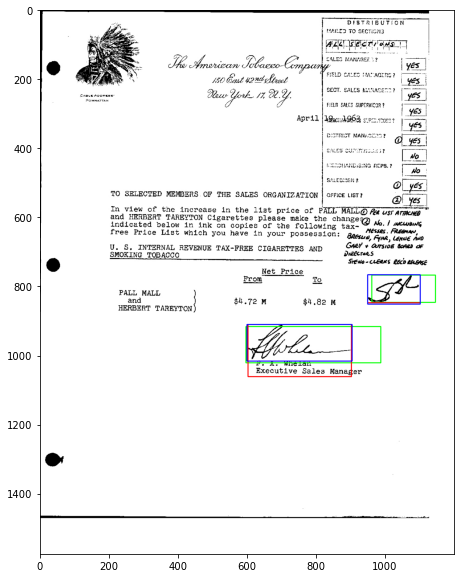

In [185]:
color = (0, 255,0)
thickness =2
image_with_box =cv2.rectangle(image, (595, 916), (595+390, 916+105), color, thickness) #azure green
image_with_box =cv2.rectangle(image, (959, 767), (959+184, 767+79), color, thickness) #azure

image_with_box =cv2.rectangle(image, (601, 910), (900, 1061), (255, 0, 0), thickness) #yolo red
image_with_box =cv2.rectangle(image, (947, 766), (1099, 847), (255, 0, 0), thickness) #yolo


image_with_box = cv2.rectangle(image, (947, 766), (947+152, 766+85), (0, 0, 255), thickness) #groundtruth blue
image_with_box = cv2.rectangle(image, (598, 910), (598+304, 910+106), (0, 0, 255), thickness) #groundtruth

plt.figure(figsize=(15, 10))
plt.imshow(image_with_box)

plt.show()